# Figure 5 and Supplemental Figure S2

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import glob
sns.set_style('whitegrid')

In [2]:
def parse_vcf(file_name):
    gm_fh=open(file_name)
    #parse files
    tsv = []
    for line in gm_fh:
        sline=line.strip().split()
        if not sline[0].startswith("#"):
            tsv.append(sline)
            
    AO=[]
    RO=[]
    AB=[]
    AB2=[]
    AB3=[]
    AB4=[]
    for line in tsv:
        sline=line[7].split(';')
        freq=sline[0].split('=')[1]
        #values = freq.split(',')
        
        AO = sline[5].split('=')[1].split(',')
        AO= [int(num) for num in AO]
        #AO = [int(num) for num in AO if int(num) >= 3]
        if len(AO) >= 1:
            RO = int(sline[28].split('=')[1])
            total = sum(AO) + RO
            values = [el/total for el in AO]
            values.append(RO/total)
        
            if len(values) == 2:
                if float(values[0]) > 0:
                    #values.append(str(1.-float(values[0])))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[0]))
            elif len(values) == 3:
                if float(values[0]) > 0:
                    #values.append(str(1. - ( float(values[-2]) + float(values[-1]) ) ))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[-2]))
                    AB3.append(float(values_sort[0]))
            elif len(values) == 4:
                if float(values[0]) > 0:
                    #values.append(str(1.-(float(values[-1])+float(values[-2])+float(values[-3]))))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[-2]))
                    AB3.append(float(values_sort[-3]))
                    AB4.append(float(values_sort[0]))
                
    dict_stats = {}
    dict_stats['AB3'] = []
    dict_stats['AB4'] = []
    dict_stats['AB'] = AB
    dict_stats['AB2'] = AB2
    dict_stats['AB3'] = AB3
    dict_stats['AB4'] = AB4
    
    return dict_stats

In [15]:
def plot_SNP_freq(vcf_stats, title):
    plt.hist([ vcf_stats['AB'], vcf_stats['AB2'], vcf_stats['AB3'], vcf_stats['AB4'] ], bins=100, stacked=True, color = ['black', 'red', 'blue', 'cyan'])
    plt.xlim(0.1,0.9)
    plt.ylim(0,200)
    plt.grid(False)
    plt.xlabel('Frequency')
    plt.ylabel('Variant count')
    plt.title(title)
    #plt.hist(AB, bins=100)
    #plt.savefig('AWRI1499.pdf')
    #plt.show()

# Figure 5A

In [4]:
albicans_ref = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf")
parap_ref = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf")
parap_denovo = parse_vcf("/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf")
purpur_denovo = parse_vcf("/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf")

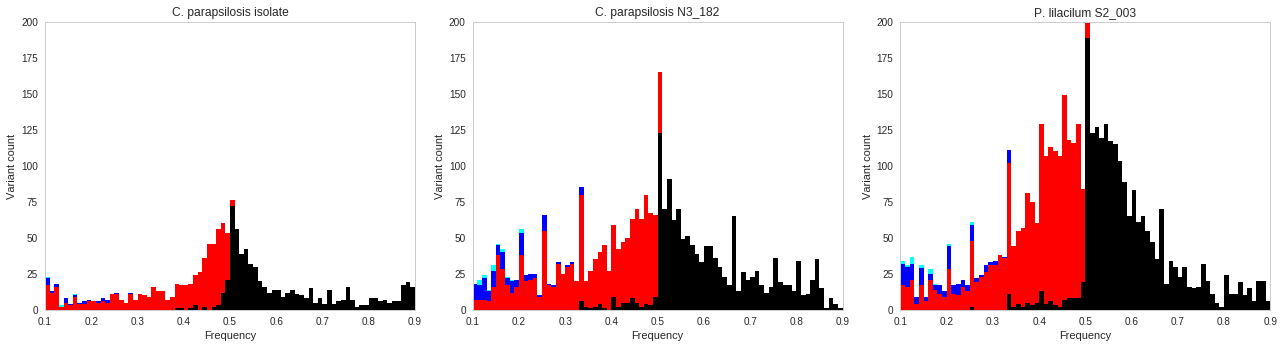

In [16]:
plt.subplot(1, 3, 1)
plot_SNP_freq(parap_ref, "C. parapsilosis isolate")
plt.subplot(1, 3, 2)
plot_SNP_freq(parap_denovo, "C. parapsilosis N3_182")
plt.subplot(1, 3, 3)
plot_SNP_freq(purpur_denovo, "P. lilacilum S2_003")
plt.gcf().set_size_inches(18, 5)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_3panel_parap_ref.pdf')
plt.show()

In [6]:
def build_snp_info_table(name, genome_length, file_path):
    stats = parse_vcf(file_path)
    stats['genome_length'] = genome_length
    stats['name'] = name
    stats['total_multiallelic'] = len([element for element in stats['AB3'] if element >= .1])
    stats['total'] = len([element for element in stats['AB'] if element >= .1])
    return stats

In [17]:
def plot_SNP_freq(vcf_stats, title):
    plt.hist([ vcf_stats['AB'], vcf_stats['AB2'], vcf_stats['AB3'], vcf_stats['AB4'] ], bins=100, stacked=True, color = ['black', 'red', 'blue', 'cyan'])
    plt.xlim(0.1,0.9)
    #plt.ylim(0,200)
    plt.grid(False)
    plt.xlabel('Frequency')
    plt.ylabel('Variant count')
    plt.title(title)
    #plt.hist(AB, bins=100)
    #plt.savefig('AWRI1499.pdf')
    #plt.show()

In [27]:
sim_allele_stats = []
sim_allele_stats.append(build_snp_info_table('Simulated haploid 10x', 14509911, "vcfs/haploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated haploid 100x', 14509911, "vcfs/haploid_reads_100x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated diploid 10x', 14509911, "vcfs/diploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated diploid 100x', 14509911, "vcfs/diploid_reads_100x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated triploid 10x', 14509911, "vcfs/triploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated triploid 100x', 14509911, "vcfs/triploid_reads_100x.sam.bam.rmdup.vcf"))

# Figure 5 B and C

In [28]:
allele_stats = []
allele_stats.append(build_snp_info_table('C. albicans isolate', 14509911, "vcfs/new_albicans_1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis isolate', 13030174, "vcfs/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. albicans SP_CRL_000G1', 12561678, "vcfs/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis N3_182_000G1', 12563647, "vcfs/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. lusitaniae N2_070_000G1', 11907650, "vcfs/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_003_000R1', 35724498, "vcfs/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_018_006G1', 35688710, "vcfs/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_018_000R2', 44952822, "vcfs/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_009_000R2', 31143909, "vcfs/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Exophilia sp. S2_009_000R2', 24670482, "vcfs/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Verruconis sp. S2_005_001R2', 15639153, "vcfs/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('T. asahii N5_275_008G1', 23419590, "vcfs/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Malassesia sp. S2_018_000R1', 6457898, "vcfs/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Rhabtida S2_005_001R2', 50505025, "vcfs/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Diptera S2_005_002R2', 43769201, "vcfs/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

In [10]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

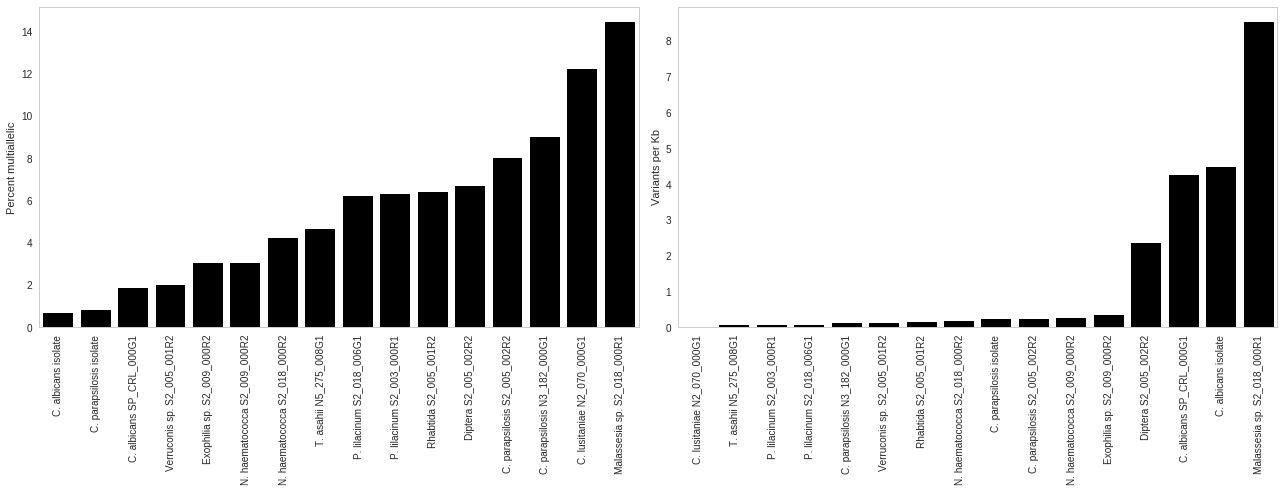

In [19]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_bottompanel_barplots.pdf')

# Simulated Reads Variant Frequency plots
### (Supplemental Figure S2)

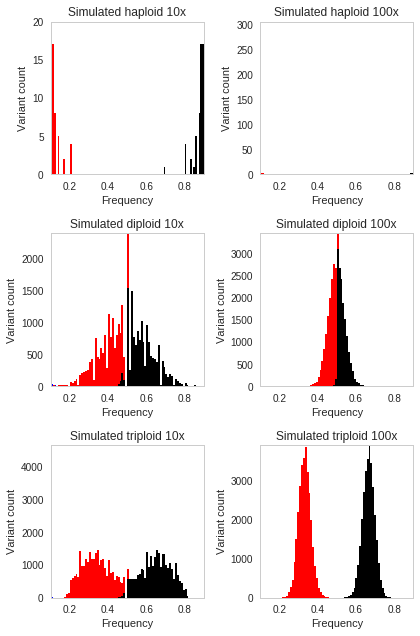

In [20]:
for i in range(0, 3):
    for j in range(0, 2):
        plt.subplot(3, 2, i*2+j+1)
        plot_SNP_freq(sim_allele_stats[i*2+j], sim_allele_stats[i*2+j]['name'])
plt.gcf().set_size_inches(6, 9)
plt.tight_layout()
#plt.savefig('suppA_sim_ploidy.pdf')
plt.show()

# Other Genomic Variant Frequency plots
### (Supplemental Figure S2)

In [21]:
allele_stats = []
#allele_stats.append(build_snp_info_table('C. albicans isolate', 14509911, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table('C. parapsilosis isolate', 13030174, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. albicans SP_CRL_000G1', 12561678, "/data8/Human/FungiPaper/SNPcalling/mapping/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis S2_005_002R2', 11573959, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_43/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. lusitaniae N2_070_000G1', 11907650, "/data8/Human/FungiPaper/SNPcalling/mapping/N2_070_000G1_concoct_33/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table('P. lilacinum S2_003_000R1', 35724498, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_018_006G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_018_000R2', 44952822, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000_R2_1/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Verruconis sp. S2_005_001R2', 15639153, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_2/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('T. asahii N5_275_008G1', 23419590, "/data8/Human/FungiPaper/SNPcalling/mapping/N5_275_008G1_concoct_53/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Malassesia sp. S2_018_000R1', 6457898, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000R1_concoct_23/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Rhabtida S2_005_001R2', 50505025, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_1/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Diptera S2_005_002R2', 43769201, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_11/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

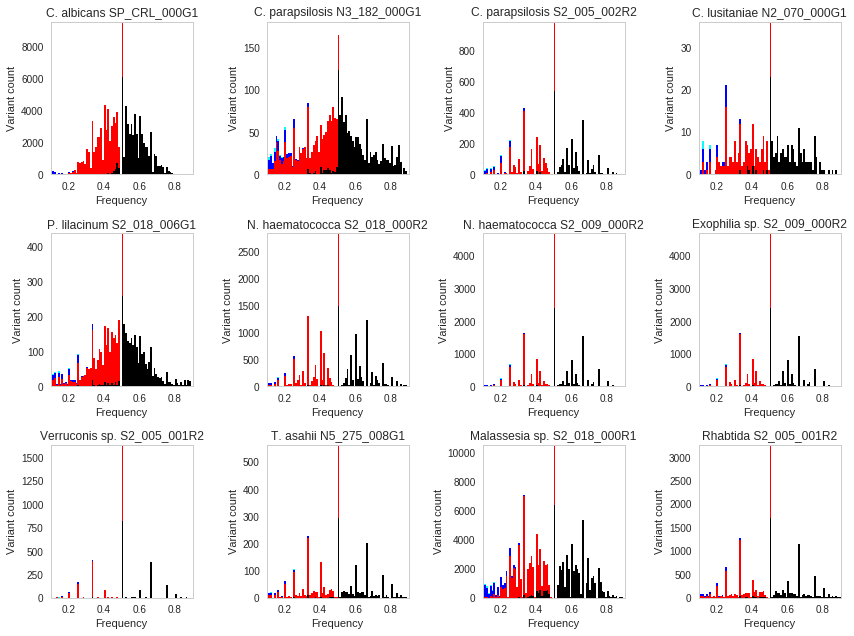

In [22]:
for i in range(0, 3):
    for j in range(0, 4):
        plt.subplot(3, 4, i*4+j+1)
        plot_SNP_freq(allele_stats[i*4+j], allele_stats[i*4+j]['name'])
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig('suppA_ploidy.pdf')
plt.show()